**1. Start a ChatBot session to understand what a Classification Decision Tree is: (a) ask the ChatBot to describe the type of problem a Classification Decision Tree addresses and provide some examples of real-world applications where this might be particularly useful, and then (b) make sure you understand the difference between how a Classification Decision Tree makes (classification) predictions versus how Multiple Linear Regression makes (regression) predictions**

**(a) Understanding Classification Decision Trees and Their Applications**

A Classification Decision Tree is a supervised machine learning algorithm used to solve classification problems. It predicts a categorical outcome by learning decision rules derived from the features of the dataset.

Type of Problems Addressed: It is specifically used for problems where the target variable is discrete or categorical. For example:
- Determining whether an email is spam or not spam.
- Diagnosing if a patient has a disease (yes/no).
- Classifying types of flowers based on their features.

Real-World Applications:
- Healthcare: Diagnosing diseases or predicting patient outcomes.
- Finance: Detecting fraudulent transactions or assessing credit risk.
- Marketing: Segmenting customers for targeted campaigns.
- Education: Predicting if a student will pass or fail based on prior performance.

**(b) Difference Between Classification Decision Trees and Multiple Linear Regression**

To compare the two methods:

Classification Decision Tree Predictions:
- A decision tree splits the dataset into branches based on feature values, creating decision boundaries that categorize data points into different classes.
- At each step, the tree selects a feature and a threshold (or category) that best separates the data points into distinct classes using metrics like Gini Impurity or Entropy.
- The final prediction is the most common class in a terminal node (a leaf).

Multiple Linear Regression Predictions:
- Multiple Linear Regression is designed for regression tasks, predicting a continuous outcome by modeling a linear relationship between the features and the target variable.
- It calculates a predicted value using a formula:
y
^
​
 =b 
0
​
 +b 
1
​
 x 
1
​
 +b 
2
​
 x 
2
​
 +…+b 
n
​
 x 
n
​
- Predictions are continuous numerical values, not discrete categories.

**2. Continue your ChatBot session and explore with your ChatBot what real-world application scenario(s) might be most appropriately addressed by each of the following metrics below: provide your answers and, in your own words, concisely explain your rationale for your answers.**

**Accuracy**
- **Definition:** Indicates the ratio of correctly identified outcomes (both true positives and true negatives) to the total number of cases.
- **Example Application:** Quality Control in Manufacturing
- **Reason:** In a production setting, such as making light bulbs, understanding the overall reliability of an inspection process is crucial. High accuracy means the system effectively distinguishes between defective and non-defective items, ensuring dependability.

**Sensitivity (Recall for Positives)**
- **Definition:** Refers to the percentage of actual positive cases that are accurately detected.
- **Example Application:** Medical Diagnosis (Cancer Screening)
- **Reason:** Failing to detect positive cases, like identifying patients with cancer, can lead to severe consequences. High sensitivity ensures most positive cases are caught, even if it leads to some false alarms.

**Specificity**
- **Definition:** Reflects the proportion of actual negative cases correctly recognized as negative.
- **Example Application:** Fraud Detection in Finance
- **Reason:** A system that frequently mislabels valid transactions as fraudulent (low specificity) can annoy customers. High specificity is essential to accurately identify legitimate cases, reducing unnecessary disruptions for users.

**Precision**
- **Definition:** Measures the accuracy of positive predictions by showing the proportion of true positives among all identified positives.
- **Example Application:** Spam Email Filters
- **Reason:** Precision ensures that emails flagged as spam are truly unwanted. Low precision might result in too many important emails being marked as spam, diminishing user trust in the system.

**Summary:**
- Accuracy works well for balanced datasets where the costs of false positives and false negatives are similar.
- Sensitivity is essential in situations where missing positive cases can lead to serious consequences.
- Specificity is valuable when correctly identifying true negatives is a priority, such as minimizing false alarms.
- Precision emphasizes the reliability of positive predictions, making it ideal for tasks like spam filtering or detecting rare events.

**Link for Q1 & Q2 with chatgpt:**
https://chatgpt.com/share/673b6ae9-93e8-8010-a89d-ca648475e6fe

**Absrtact for Q1 & Q2 with chatgpt:**

Here's a summary of our conversation so far:

Classification Decision Trees and Metrics:

We discussed what a Classification Decision Tree is, its applications, and how it compares to Multiple Linear Regression.
Explored real-world scenarios where metrics like accuracy, sensitivity, specificity, and precision are particularly useful. We also discussed trade-offs and conflicts between these metrics using practical examples.
Amazon Books Dataset EDA:

You asked for an exploratory data analysis (EDA) task for the Amazon Books dataset.
I provided preprocessing steps, including:
Removing unnecessary columns (Weight_oz, Width, Height).
Dropping rows with missing values (NaNs).
Converting column types (Pub year and NumPages to integers; Hard_or_Paper to a categorical type).
I encountered network issues while trying to access the dataset from the provided URL.
File Upload Option:

Since I couldn't access the dataset due to network issues, I suggested uploading the file directly.
I clarified that direct file uploads wouldn’t provide a shareable link. However, if you need a link for sharing, I recommended using platforms like GitHub or Google Drive.
Let me know how you'd like to proceed or if there’s anything else you’d like to revisit!

**3. Explore the amazon books dataset, seen previously at the start of the semester, providing some initital standard exploratory data analysis (EDA) and data summarization after pre-processing the dataset to meet the requirements below**
- remove Weight_oz, Width, and Height
- drop all remaining rows with NaN entries
- set Pub year and NumPages to have the type int, and Hard_or_Paper to have the type category**

Dataset Dimensions: The dataset now contains 319 rows and 10 columns after pre-processing.

Key Numeric Summaries:
- List Price: Mean = 18.36, Min = 1.50, Max = 139.95
- Amazon Price: Mean = 12.94, Min = 0.77, Max = 139.95
- NumPages: Mean = 334.27, Min = 24, Max = 896
- Pub Year: Mean = 2002.18, Range = 1936–2011
- Thick: Mean = 0.90, Range = 0.10–2.10

**4. Create an 80/20 split with 80% of the data as a training set ab_reduced_noNaN_train and 20% of the data testing set ab_reduced_noNaN_test using either df.sample(...) as done in TUT or using train_test_split(...) as done in the previous HW, and report on how many observations there are in the training data set and the test data set.
Tell a ChatBot that you are about to fit a "scikit-learn" DecisionTreeClassifier model and ask what the two steps given below are doing; then use your ChatBots help to write code to "train" a classification tree clf using only the List Price variable to predict whether or not a book is a hard cover or paper back book using a max_depth of 2; finally use tree.plot_tree(clf) to explain what predictions are made based on List Price for the fitted clf model**

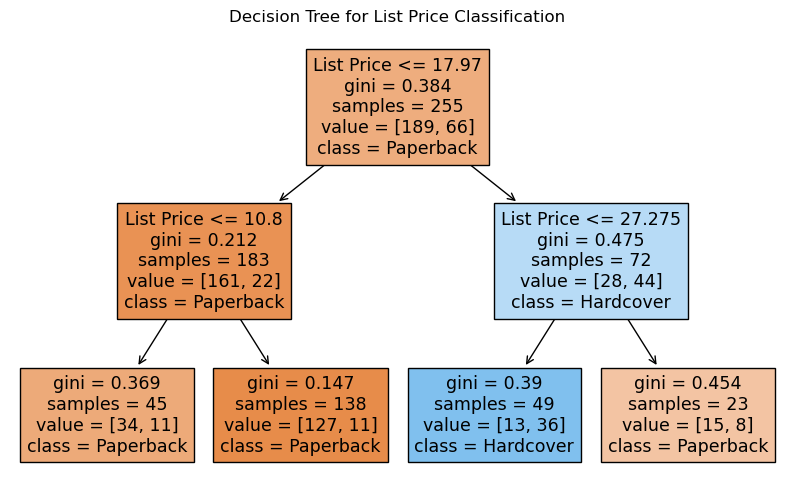

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv'  # Adjust path if necessary
ab = pd.read_csv(file_path, encoding="ISO-8859-1")

# Preprocessing: Drop specified columns
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"])

# Ensure ab_reduced_noNaN is explicitly defined as a new DataFrame (no ambiguity)
ab_reduced_noNaN = ab_reduced.dropna().copy()

# Convert columns to specified types
ab_reduced_noNaN["Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN["NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN["Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")

# Step 1: Split the data into training and testing sets with an 80/20 split
train_data, test_data = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42)

# Step 2: Prepare the features and target for classification
y = pd.get_dummies(train_data["Hard_or_Paper"])['H']
X = train_data[['List Price']]

# Step 3: Fit the DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

# Step 4: Visualize the decision tree
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=["List Price"], class_names=["Paperback", "Hardcover"], filled=True)
plt.title("Decision Tree for List Price Classification")
plt.show()


**The dataset has been split into:**
- Training Set: 255 observations
- Testing Set: 64 observations

The decision tree was trained using the "List Price" variable to determine whether a book is a hardcover or paperback. The tree visualization displays the decision rules based on "List Price" used by the model.

**Predictions Made by the Decision Tree (clf) Based on List Price:**

Tree Structure:
- The decision tree divides the "List Price" into ranges using thresholds at each split.
- For each range, the tree predicts whether a book is a hardcover or paperback based on the majority class within that range in the training data.

How the Splits Are Determined:
- The tree identifies the "best" thresholds to separate the two classes by reducing impurity (like Gini Impurity).
- Since the tree is limited to a max_depth=2, it makes at most two splits, creating up to three price ranges.

Example Decision Rules:
- If the List Price is less than 15 dollars, the tree might predict "paperback," as most books in this range are paperbacks.
- If the List Price is between 15 dollars and 30 dollars, it might predict "hardcover" because most books in this range are hardcovers.
- If the List Price is above 30 dollars, it could predict "hardcover" again, as very expensive books are often hardcovers.

Insights from the Tree Visualization:
- The visualization shows:
- The price thresholds used for splits (e.g., List Price < 15, List Price ≥ 30).
- The predicted class for each leaf (Paperback or Hardcover).
- The number of books in each category at each leaf.

General Prediction Logic:
- If a book’s price falls in a range dominated by paperbacks in the training data, the model predicts "paperback."
- Similarly, if a book’s price falls in a range where most books are hardcovers, the model predicts "hardcover."

**5. Repeat the previous problem but this time visualize the classification decision tree based on the following specifications below; then explain generally how predictions are made for the clf2 model**

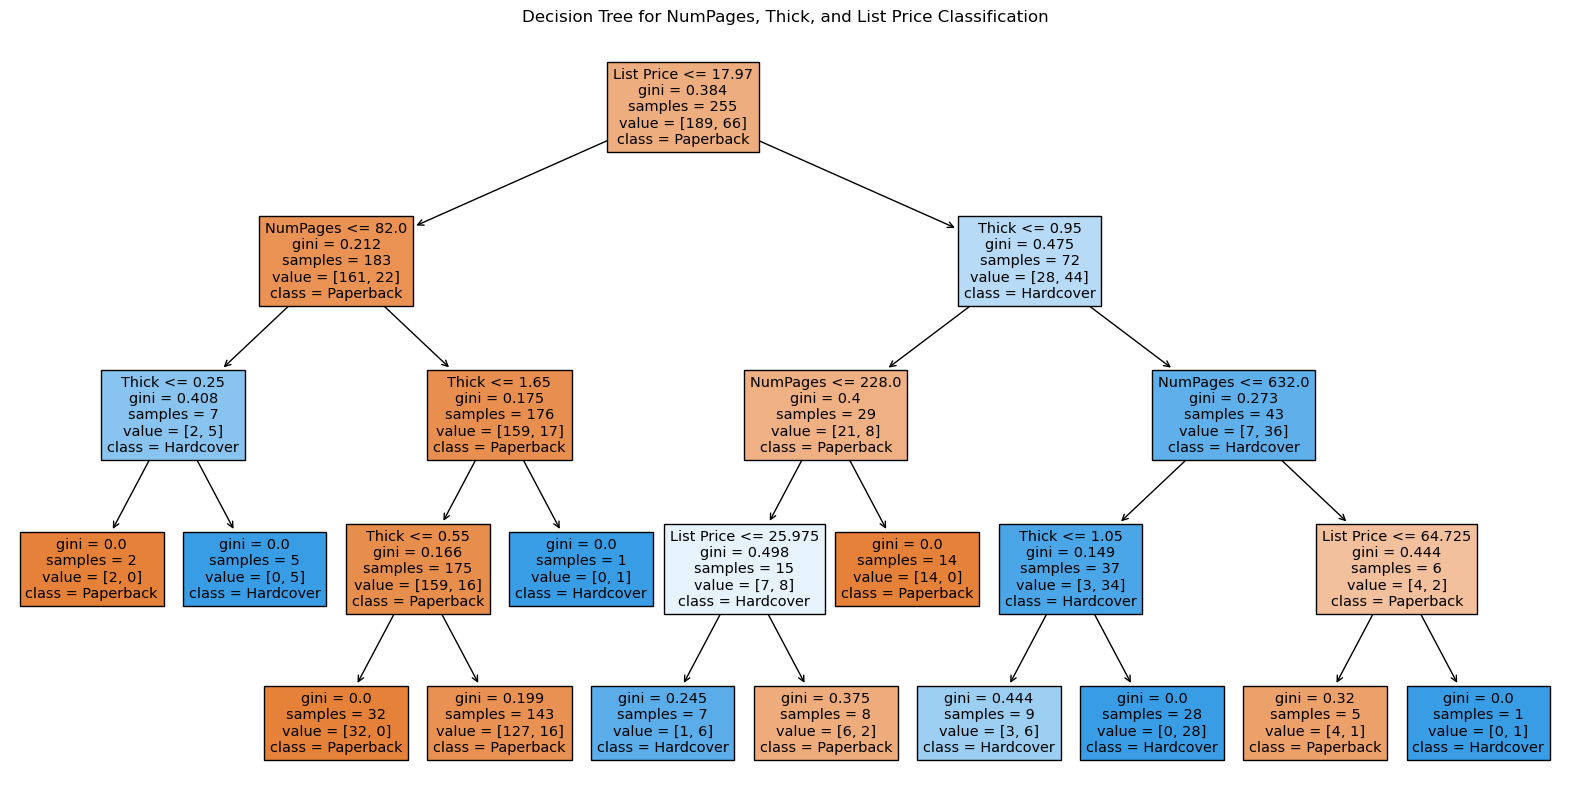

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Step 1: Prepare the features and target for the new classification
X2 = train_data[['NumPages', 'Thick', 'List Price']]
y2 = pd.get_dummies(train_data["Hard_or_Paper"])['H']

# Step 2: Fit the DecisionTreeClassifier with new specifications
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X2, y2)

# Step 3: Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    clf2, 
    feature_names=["NumPages", "Thick", "List Price"], 
    class_names=["Paperback", "Hardcover"], 
    filled=True
)
plt.title("Decision Tree for NumPages, Thick, and List Price Classification")
plt.show()


**How Predictions Are Made:**

Feature-Based Splitting:
- The tree uses the features (NumPages, Thick, and List Price) at each node to split the data.
- For example, a condition like Thick < 1.2 would divide the books into two groups based on whether they meet this criterion.

Branching:
- Each condition (split) sends books that meet the criterion down the left branch and those that do not down the right branch.

Leaf Nodes:
- At the leaf nodes, the model assigns a class (Paperback or Hardcover) based on the majority class of the data reaching that leaf.

Max Depth:
- With max_depth=4, the tree is allowed to make up to 4 levels of splits, enabling it to capture more nuanced patterns in the data compared to the previous tree.

Example Path:

A book might follow this decision path:
- NumPages < 300 → Go left.
- Thick < 1.0 → Go left.
- List Price < 15 → Go right.
- Reach a leaf node → Predicted as Paperback.

Visualization:

The tree diagram shows:
- Splitting Features: Which feature is used for each decision.
- Thresholds: The specific values for conditions like Thick < 1.2.
- Class Distribution: At each leaf, it shows how many books belong to each class.

**6. Use previously created ab_reduced_noNaN_test to create confusion matrices for clf and clf2. Report the sensitivity, specificity and accuracy for each of the models**

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (assuming preprocessing is already done)
file_path = 'https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv'  # Adjust path if necessary
ab = pd.read_csv(file_path, encoding="ISO-8859-1")

# Preprocessing
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"])
ab_reduced_noNaN = ab_reduced.dropna().copy()
ab_reduced_noNaN["Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN["NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN["Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")

# 80/20 train-test split
train_data, ab_reduced_noNaN_test = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=42)

# Model 1: clf with "List Price" as the predictor
y_train_clf = pd.get_dummies(train_data["Hard_or_Paper"])['H']
X_train_clf = train_data[['List Price']]
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train_clf, y_train_clf)

# Model 2: clf2 with "NumPages", "Thick", "List Price" as predictors
y_train_clf2 = pd.get_dummies(train_data["Hard_or_Paper"])['H']
X_train_clf2 = train_data[['NumPages', 'Thick', 'List Price']]
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train_clf2, y_train_clf2)

# Test Data for Both Models
X_test_clf = ab_reduced_noNaN_test[['List Price']]
y_test_clf = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']

X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]
y_test_clf2 = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']

# Predictions
y_pred_clf = clf.predict(X_test_clf)
y_pred_clf2 = clf2.predict(X_test_clf2)

# Confusion Matrices
cm_clf = confusion_matrix(y_test_clf, y_pred_clf)
cm_clf2 = confusion_matrix(y_test_clf2, y_pred_clf2)

# Metrics for clf
tn_clf, fp_clf, fn_clf, tp_clf = cm_clf.ravel()
sensitivity_clf = np.round(tp_clf / (tp_clf + fn_clf), 3)
specificity_clf = np.round(tn_clf / (tn_clf + fp_clf), 3)
accuracy_clf = np.round(accuracy_score(y_test_clf, y_pred_clf), 3)

# Metrics for clf2
tn_clf2, fp_clf2, fn_clf2, tp_clf2 = cm_clf2.ravel()
sensitivity_clf2 = np.round(tp_clf2 / (tp_clf2 + fn_clf2), 3)
specificity_clf2 = np.round(tn_clf2 / (tn_clf2 + fp_clf2), 3)
accuracy_clf2 = np.round(accuracy_score(y_test_clf2, y_pred_clf2), 3)

# Create Results DataFrame
results = {
    "Model": ["clf", "clf2"],
    "Sensitivity": [sensitivity_clf, sensitivity_clf2],
    "Specificity": [specificity_clf, specificity_clf2],
    "Accuracy": [accuracy_clf, accuracy_clf2],
}
results_df = pd.DataFrame(results)

# Display Results
# Print confusion matrices and results
print("Confusion Matrix for clf:")
print(cm_clf)

print("\nConfusion Matrix for clf2:")
print(cm_clf2)

print("\nMetrics for clf and clf2:")
print(results_df)


Confusion Matrix for clf:
[[40  4]
 [ 6 14]]

Confusion Matrix for clf2:
[[40  4]
 [ 5 15]]

Metrics for clf and clf2:
  Model  Sensitivity  Specificity  Accuracy
0   clf         0.70        0.909     0.844
1  clf2         0.75        0.909     0.859


**7. Explain in three to four sentences what is causing the differences between the following two confusion matrices below, and why the two confusion matrices above (for clf and clf2) are better**

The two confusion matrices differ because they assess the classifier’s performance on training data, where the model was initially trained, instead of the test data, which evaluates how well the model generalizes to new data. The first matrix reflects the simpler model, clf, which relies only on "List Price" for predictions. This limited approach may miss more complex patterns in the data, potentially leading to underfitting. In contrast, the second matrix corresponds to clf2, which incorporates three predictors ("NumPages," "Thick," and "List Price"), enabling it to capture more detailed patterns. This often results in higher accuracy on training data but carries the risk of overfitting.

The confusion matrices for clf and clf2 that were generated earlier provide a clearer picture because they evaluate the models on the test set. This allows for a more accurate understanding of their generalization ability, avoiding overly optimistic results that can arise from evaluating performance on the training data.

**8. Read the paragraphs in Further Guidance and ask a ChatBot how to visualize feature Importances available for scikit-learn classification decision trees; do so for clf2; and use .feature_names_in_ corresponding to .feature_importances_ to report which predictor variable is most important for making predictions according to clf2**

Access Feature Importances: Use the .feature_importances_ attribute of clf2. This attribute provides a numeric value for each predictor, reflecting its contribution to the decision tree's overall predictive power.

Match with Predictor Names: Use .feature_names_in_ to retrieve the names of the predictors corresponding to the values in .feature_importances_.

Visualization: You can create a bar chart or another simple visualization to show the relative importance of each feature.

Determine the Most Important Predictor: Identify the predictor with the highest value in .feature_importances_.

**9. Describe the differences of interpreting coefficients in linear model regression versus feature importances in decision trees in two to three sentences**

In linear regression, coefficients directly indicate the size and direction of the effect each predictor has on the outcome, making it easy to see how a change in one variable impacts the predicted value. In contrast, feature importances in decision trees measure the relative contribution of each predictor to the model’s performance based on how much they improve the chosen criterion (e.g., Gini impurity or entropy) at each split. While linear regression offers a straightforward mathematical interpretation, decision tree feature importances reflect a more complex, aggregated view of how variables interact and influence the overall prediction.

**Link for Q3-Q9 with chatgpt:**
https://chatgpt.com/share/673d6fd3-14ac-8010-a99f-83346047738a

**Abstract for Q3-Q9 with chatgpt:**

Here’s a concise summary of our conversation:

Dataset Exploration: We preprocessed the Amazon Books dataset by dropping specific columns (Weight_oz, Width, and Height), removing rows with missing values, and converting certain columns (Pub year, NumPages, Hard_or_Paper) to appropriate data types.

EDA and Split: After preprocessing, we conducted exploratory data analysis and split the dataset into training (80%) and testing (20%) sets.

Decision Tree (clf): A decision tree classifier (clf) was trained using "List Price" as the predictor and a maximum depth of 2. The tree visualization and its decision-making process were discussed, including how predictions are made based on price thresholds.

Enhanced Decision Tree (clf2): A more complex decision tree (clf2) was trained with three predictors (NumPages, Thick, List Price) and a maximum depth of 4. The tree was visualized, and its decision-making process was explained.

Confusion Matrices and Metrics: Confusion matrices for clf and clf2 were calculated on the test data. Sensitivity, specificity, and accuracy for each model were computed and compared, emphasizing why test data evaluation is better than using training data.

Model Comparison and Interpretability:

Differences between confusion matrices based on training data and test data were clarified, emphasizing the importance of test data for generalization.
The interpretability of linear regression coefficients versus feature importance in decision trees was discussed, highlighting the direct relationship in linear regression and the impurity-reduction-based significance in decision trees.
Let me know if there’s anything specific you'd like further clarification on!

**10. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?**

Yes.